In [1]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
#client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8pt5-q6wp", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,10,July 2 - July 7,32.3,28.2,36.6,28.2 - 36.6,31.4-32.9
1996,Symptoms of Anxiety Disorder,By State,Kentucky,Kentucky,10,July 2 - July 7,36.3,31.2,41.6,31.2 - 41.6,35.4-40.6
1997,Symptoms of Anxiety Disorder,By State,Louisiana,Louisiana,10,July 2 - July 7,38.6,34.2,43.1,34.2 - 43.1,35.4-40.6
1998,Symptoms of Anxiety Disorder,By State,Maine,Maine,10,July 2 - July 7,32.8,29,36.7,29.0 - 36.7,31.4-32.9


In [2]:
# subgroup filtered by United States
usa = results_df[results_df["subgroup"].isin(["United States"])]
usa.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,30.8,30,31.7,30.0 - 31.7,NaN
140,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,Apr 23 - May 5,35.9,35,36.8,35.0 - 36.8,NaN
210,Symptoms of Depressive Disorder,National Estimate,United States,United States,2,May 7 - May 12,24.1,23,25.2,23.0 - 25.2,NaN
280,Symptoms of Anxiety Disorder,National Estimate,United States,United States,2,May 7 - May 12,30,28.9,31,28.9 - 31.0,NaN


In [3]:
# Checking the number of data for United States.
usa_total = len(usa["state"])
usa_total

29

In [4]:
# subgroup filtered by Kansas and Missouri
ks_mo = results_df[results_df["subgroup"].isin(["Kansas", "Missouri"])]
ks_mo.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
35,Symptoms of Depressive Disorder,By State,Kansas,Kansas,1,Apr 23 - May 5,22.1,18.3,26.4,18.3 - 26.4,20.8 - 22.1
44,Symptoms of Depressive Disorder,By State,Missouri,Missouri,1,Apr 23 - May 5,21,17.9,24.5,17.9 - 24.5,20.8 - 22.1
105,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,1,Apr 23 - May 5,26.4,22,31.2,22.0 - 31.2,21.7 - 27.8
114,Symptoms of Anxiety Disorder,By State,Missouri,Missouri,1,Apr 23 - May 5,30.4,25.8,35.4,25.8 - 35.4,30.4 - 31.6
175,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Kansas,Kansas,1,Apr 23 - May 5,32.5,28.4,36.9,28.4 - 36.9,25.6 - 33.3


In [5]:
# Checking the number of data for Kansas and Missouri.
ks_mo_total = len(ks_mo["state"])
ks_mo_total

57

In [6]:
# subgroup filtered by only Kansas 
ks = results_df[results_df["subgroup"].isin(["Kansas"])]
ks.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
35,Symptoms of Depressive Disorder,By State,Kansas,Kansas,1,Apr 23 - May 5,22.1,18.3,26.4,18.3 - 26.4,20.8 - 22.1
105,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,1,Apr 23 - May 5,26.4,22,31.2,22.0 - 31.2,21.7 - 27.8
175,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Kansas,Kansas,1,Apr 23 - May 5,32.5,28.4,36.9,28.4 - 36.9,25.6 - 33.3
245,Symptoms of Depressive Disorder,By State,Kansas,Kansas,2,May 7 - May 12,16.7,12.8,21.2,12.8 - 21.2,16.7 - 20.6
315,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,2,May 7 - May 12,25.1,20,30.9,20.0 - 30.9,20.3 - 26.2


In [7]:
# Checking the number of data for Kansas.
ks_total = len(ks["state"])
ks_total

29

In [8]:
# subgroup filtered by only Missouri 
mo = results_df[results_df["subgroup"].isin(["Missouri"])]
mo.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
44,Symptoms of Depressive Disorder,By State,Missouri,Missouri,1,Apr 23 - May 5,21,17.9,24.5,17.9 - 24.5,20.8 - 22.1
114,Symptoms of Anxiety Disorder,By State,Missouri,Missouri,1,Apr 23 - May 5,30.4,25.8,35.4,25.8 - 35.4,30.4 - 31.6
184,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Missouri,Missouri,1,Apr 23 - May 5,35.2,30.2,40.4,30.2 - 40.4,34.8 - 36.7
254,Symptoms of Depressive Disorder,By State,Missouri,Missouri,2,May 7 - May 12,24.1,18.5,30.5,18.5 - 30.5,23.1 - 25.6
324,Symptoms of Anxiety Disorder,By State,Missouri,Missouri,2,May 7 - May 12,37.8,32.3,43.7,32.3 - 43.7,31.6 - 38.3


In [9]:
# Checking the number of data for Missouri.
mo_total = len(mo["state"])
mo_total

28

### Symptoms of Depressive Disorder by state

In [10]:
# Creating a new dataframe to show number of Symptoms of Depressive Disorder
depression_df = results_df.loc[results_df["indicator"] == "Symptoms of Depressive Disorder"]
depression_df.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25,21.5 - 25.0,NaN


In [11]:
# Data of Symptoms of Depressive Disorder (US)
depression_us = depression_df.groupby(["subgroup"]).get_group("United States")
depression_us

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
210,Symptoms of Depressive Disorder,National Estimate,United States,United States,2,May 7 - May 12,24.1,23,25.2,23.0 - 25.2,NaN
420,Symptoms of Depressive Disorder,National Estimate,United States,United States,3,May 14 - May 19,24.4,23.7,25.2,23.7 - 25.2,NaN
630,Symptoms of Depressive Disorder,National Estimate,United States,United States,4,May 21 - May 26,24.9,24.1,25.7,24.1 - 25.7,NaN
840,Symptoms of Depressive Disorder,National Estimate,United States,United States,5,May 28 - June 2,25.3,24.7,25.8,24.7 - 25.8,NaN
1050,Symptoms of Depressive Disorder,National Estimate,United States,United States,6,June 4 - June 9,25.8,25,26.7,25.0 - 26.7,NaN
1260,Symptoms of Depressive Disorder,National Estimate,United States,United States,7,June 11 - June 16,25.1,24.3,25.9,24.3 - 25.9,NaN
1470,Symptoms of Depressive Disorder,National Estimate,United States,United States,8,June 18 - June 23,25.6,25,26.3,25.0 - 26.3,NaN
1680,Symptoms of Depressive Disorder,National Estimate,United States,United States,9,June 25 - June 30,26.9,26.1,27.7,26.1 - 27.7,NaN
1890,Symptoms of Depressive Disorder,National Estimate,United States,United States,10,July 2 - July 7,27.6,27,28.1,27.0 - 28.1,NaN


In [12]:
# Data of Symptoms of Depressive Disorder (KS)
depression_ks = depression_df.groupby(["subgroup"]).get_group("Kansas")
depression_ks

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
35,Symptoms of Depressive Disorder,By State,Kansas,Kansas,1,Apr 23 - May 5,22.1,18.3,26.4,18.3 - 26.4,20.8 - 22.1
245,Symptoms of Depressive Disorder,By State,Kansas,Kansas,2,May 7 - May 12,16.7,12.8,21.2,12.8 - 21.2,16.7 - 20.6
455,Symptoms of Depressive Disorder,By State,Kansas,Kansas,3,May 14 - May 19,21.2,17.9,24.8,17.9 - 24.8,20.8-23.2
665,Symptoms of Depressive Disorder,By State,Kansas,Kansas,4,May 21 - May 26,25.2,20.9,29.8,20.9 - 29.8,23.0-25.8
875,Symptoms of Depressive Disorder,By State,Kansas,Kansas,5,May 28 - June 2,23.1,19.7,26.8,19.7 - 26.8,21.5-24.3
1085,Symptoms of Depressive Disorder,By State,Kansas,Kansas,6,June 4 - June 9,28.6,23.4,34.3,23.4 - 34.3,27.3-30.3
1295,Symptoms of Depressive Disorder,By State,Kansas,Kansas,7,June 11 - June 16,24.6,20,29.6,20.0 - 29.6,24.0-26.7
1505,Symptoms of Depressive Disorder,By State,Kansas,Kansas,8,June 18 - June 23,24.4,20.1,29,20.1 - 29.0,22.5-25.0
1715,Symptoms of Depressive Disorder,By State,Kansas,Kansas,9,June 25 - June 30,20.9,17.6,24.5,17.6 - 24.5,19.0-23.8
1925,Symptoms of Depressive Disorder,By State,Kansas,Kansas,10,July 2 - July 7,21.5,18.5,24.8,18.5 - 24.8,17.5-23.8


In [13]:
# Data of Symptoms of Depressive Disorder (MO)
depression_mo = depression_df.groupby(["subgroup"]).get_group("Missouri")
depression_mo

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
44,Symptoms of Depressive Disorder,By State,Missouri,Missouri,1,Apr 23 - May 5,21,17.9,24.5,17.9 - 24.5,20.8 - 22.1
254,Symptoms of Depressive Disorder,By State,Missouri,Missouri,2,May 7 - May 12,24.1,18.5,30.5,18.5 - 30.5,23.1 - 25.6
464,Symptoms of Depressive Disorder,By State,Missouri,Missouri,3,May 14 - May 19,24.3,19.1,30,19.1 - 30.0,23.3-25.6
674,Symptoms of Depressive Disorder,By State,Missouri,Missouri,4,May 21 - May 26,24.3,19.6,29.5,19.6 - 29.5,23.0-25.8
884,Symptoms of Depressive Disorder,By State,Missouri,Missouri,5,May 28 - June 2,24.5,21,28.3,21.0 - 28.3,24.4-26.8
1094,Symptoms of Depressive Disorder,By State,Missouri,Missouri,6,June 4 - June 9,23.1,18.2,28.7,18.2 - 28.7,21.3-25.0
1304,Symptoms of Depressive Disorder,By State,Missouri,Missouri,7,June 11 - June 16,26.1,21.5,31,21.5 - 31.0,24.0-26.7
1514,Symptoms of Depressive Disorder,By State,Missouri,Missouri,8,June 18 - June 23,25,20.1,30.5,20.1 - 30.5,22.5-25.0
1724,Symptoms of Depressive Disorder,By State,Missouri,Missouri,9,June 25 - June 30,25.6,22.4,28.9,22.4 - 28.9,23.9-26.0
1934,Symptoms of Depressive Disorder,By State,Missouri,Missouri,10,July 2 - July 7,28.8,24.1,33.8,24.1 - 33.8,26.8-29.3


In [14]:
# Data of Symptoms of Depressive Disorder (KS&MO)
depression_ks_mo = depression_df[depression_df["subgroup"].isin(["Kansas","Missouri"])]
depression_ks_mo.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
35,Symptoms of Depressive Disorder,By State,Kansas,Kansas,1,Apr 23 - May 5,22.1,18.3,26.4,18.3 - 26.4,20.8 - 22.1
44,Symptoms of Depressive Disorder,By State,Missouri,Missouri,1,Apr 23 - May 5,21,17.9,24.5,17.9 - 24.5,20.8 - 22.1
245,Symptoms of Depressive Disorder,By State,Kansas,Kansas,2,May 7 - May 12,16.7,12.8,21.2,12.8 - 21.2,16.7 - 20.6
254,Symptoms of Depressive Disorder,By State,Missouri,Missouri,2,May 7 - May 12,24.1,18.5,30.5,18.5 - 30.5,23.1 - 25.6
455,Symptoms of Depressive Disorder,By State,Kansas,Kansas,3,May 14 - May 19,21.2,17.9,24.8,17.9 - 24.8,20.8-23.2


### Race

In [15]:
race_df = results_df.loc[results_df["group"] == "By Race/Hispanic ethnicity", :]
race_df.head() 

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
10,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,Apr 23 - May 5,29.4,26.8,32.1,26.8 - 32.1,NaN
11,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",1,Apr 23 - May 5,21.4,20.6,22.1,20.6 - 22.1,NaN
12,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",1,Apr 23 - May 5,25.6,23.7,27.5,23.7 - 27.5,NaN
13,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,Apr 23 - May 5,23.6,20.3,27.1,20.3 - 27.1,NaN
14,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,Apr 23 - May 5,28.3,24.8,32,24.8 - 32.0,NaN


In [42]:
race_df['value']=race_df['value'].astype(float)
race_mean = race_df.groupby("subgroup").mean()
race_mean

C:\Users\sakis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,value
subgroup,
Hispanic or Latino,35.027586
"Non-Hispanic Asian, single race",25.434483
"Non-Hispanic black, single race",33.500000
"Non-Hispanic white, single race",28.641379
"Non-Hispanic, other races and multiple races",39.172414


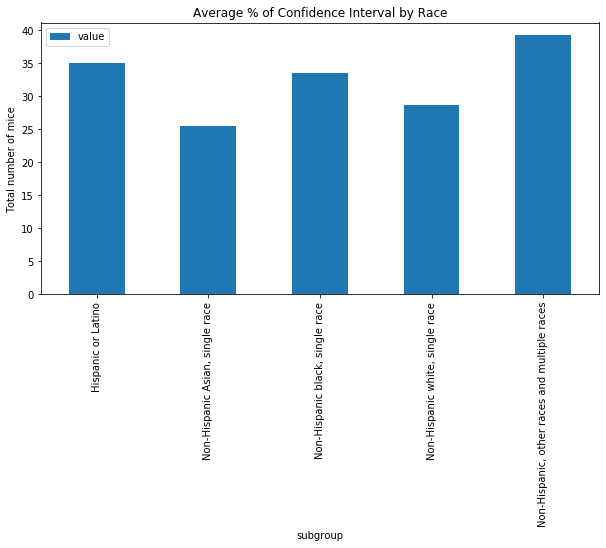

<Figure size 432x288 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt

# Use DataFrame.plot() in order to create a bar chart of the data
race_mean.plot(kind="bar", figsize=(10,5))
# Set a title for the chart
plt.title("Average % of Confidence Interval by Race")
plt.ylabel("Total number of mice")
plt.show()
plt.tight_layout()

In [36]:
Hispanic_Latino = race_df.loc[race_df["subgroup"] == "Hispanic or Latino"]
Hispanic_Latino['value']=Hispanic_Latino['value'].astype(float)
Hispanic_Latino_mean = round(Hispanic_Latino["value"].mean(),2)
Hispanic_Latino_mean


# missouri_df = results_df.loc[results_df['state']=='Missouri']
# missouri_df

# ks_mo=pd.merge(kansas_df,missouri_df, how='outer')
# ks_mo

# cleaned_KsMo=ks_mo[['indicator','state','week','value']]
# cleaned_KsMo

# cleaned=cleaned_KsMo.groupby(['week','indicator'])
# cleaned.count().head(10)

# state_mean=cleaned['value'].mean()
# final=pd.DataFrame({'KS & MO Average(%)':state_mean})
# final.head()

C:\Users\sakis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


35.03